<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/CreditCardClassificationWithKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].nunique()

2

In [7]:
train = df.drop('Class', axis=1)
test = df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

<Axes: >

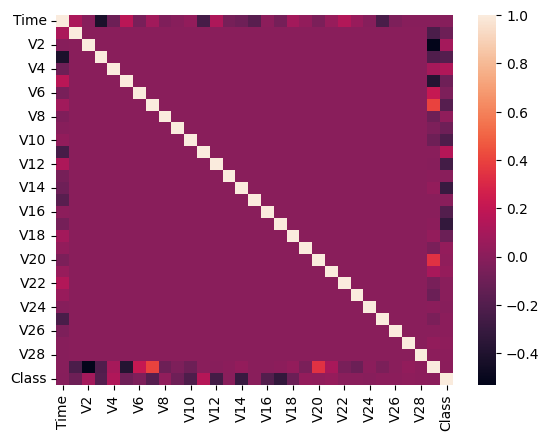

In [20]:
sns.heatmap(df.corr())

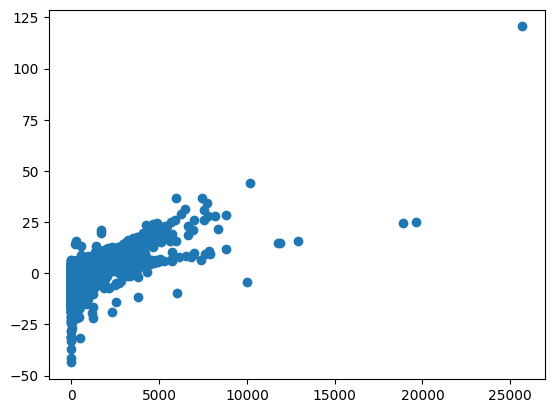

In [24]:
plt.scatter(x=df['Amount'], y=df['V7'])

# **KNN**

In [10]:
KNeighborsClassifier?

In [11]:
# n_neighbors : int, default=5
#     Number of neighbors to use by default for :meth:`kneighbors` queries.

# weights : {'uniform', 'distance'}, callable or None, default='uniform'

In [12]:
knn_clf = KNeighborsClassifier()

params = {
    'n_neighbors': range(1, 50, 5),
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_clf, params, cv=3)
knn_grid.fit(X_train.head(10_000), y_train.head(10_000))

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50, 5),
                         'weights': ['uniform', 'distance']})

In [13]:
knn_grid.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [14]:
knn_grid.best_score_

0.9987999999760024

In [25]:
best_clf = knn_grid.best_estimator_

In [28]:
best_clf.predict?

In [30]:
best_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = best_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9985136289690203

In [33]:
# IDK, mayb this code is f🤗cked up, but I'm tired to fix it... I'm lazy and I'm working 12h a day because of school👍

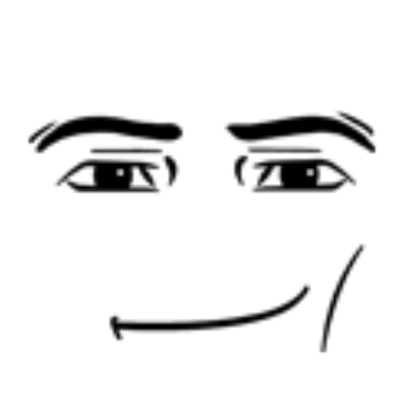